In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import os, glob
import libstempo as T2
from libstempo import toasim as LT
from libstempo import plot as LP
import enterprise
from enterprise.pulsar import Pulsar
from simFuncs import *

In [2]:
# get parfiles containing pulsar params
datadir = './mdc2/'
parfiles = sorted(glob.glob(datadir + '/*.par'))

In [3]:
# define observation times and duration
Tobs = 20.0 # years
deltaT = 20.0 # points per year
obstimes = 53000.0 + np.arange(0.0, Tobs*365.25, 365.25/20.0)
tref = obstimes[0]*86400.0

In [4]:
# create pulsar objects from parfiles
# default TOA errors are set to 0.4 microseconds
psrs = create_psrs(parfiles, obstimes=obstimes)

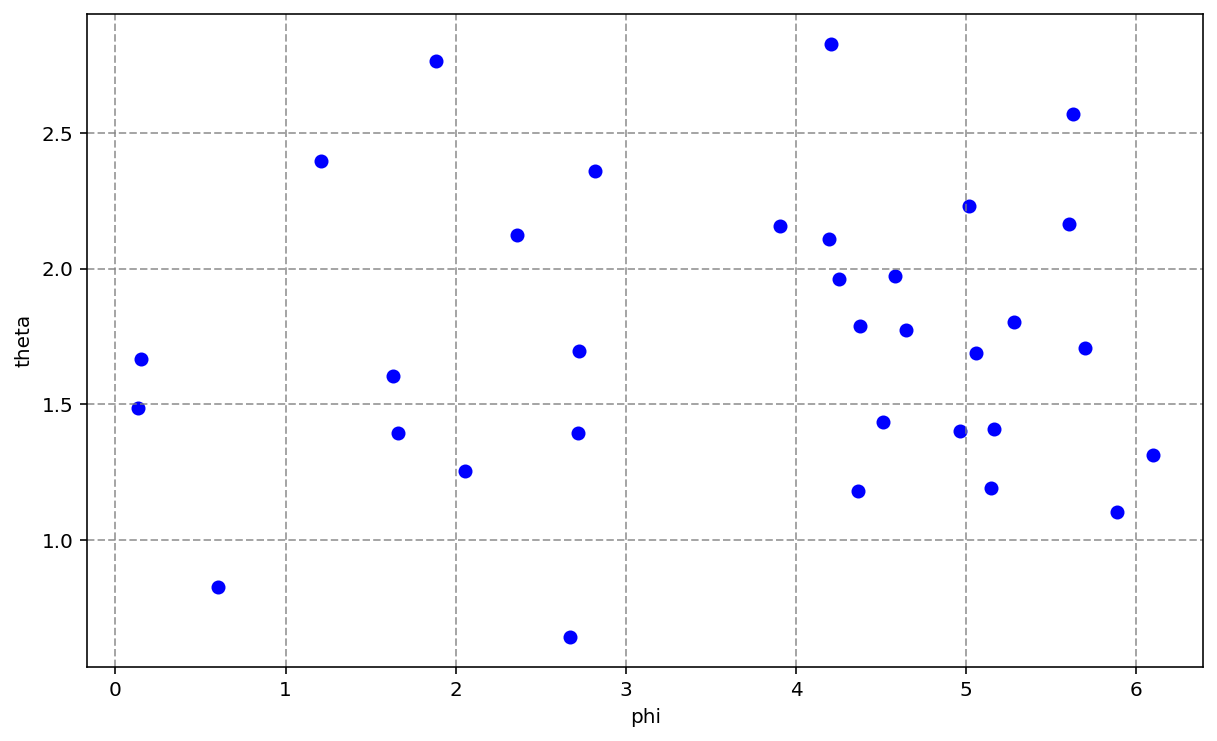

In [5]:
# plot pulsar locations for a nice visual :)
# need to convert to enterprise pulsars to get location params (irrelevant for the rest of the notebook)
Epsrs = [Pulsar(p) for p in psrs]

th = [p.theta for p in Epsrs]
ph = [p.phi for p in Epsrs]

fig = plt.figure(1, figsize=(10,6))
plt.scatter(ph, th, marker='o', color='b')
plt.grid(color='gray', ls='dashed', lw=1, alpha=0.7)
plt.xlabel('phi')
plt.ylabel('theta')
plt.show()

In [14]:
# create parameter dictionary for CW signal
# change params as needed
pdict = {'gwtheta': 1.75,
         'gwphi': 5.,
         'mc': 5e9,
         'dist': 60., 
         'fgw': 2e-8,
         'phase0': 0.0,
         'psi': np.pi/4.0,
         'inc': 0.0}

# add GWB to our pulsars
# have the option of changing amplitude and spectral index (gamma)
add_gwb(psrs)

# add CW signal to our pulsars
# prints out the name of each pulsar as it loops through
# included option to change the number of iterations for the timing model fit
add_cgw(psrs, pdict, tref, iters=5)

J0030+0451
J0034-0534
J0218+4232
J0437-4715
J0613-0200
J0621+1002
J0711-6830
J0751+1807
J0900-3144
J1012+5307
J1022+1001
J1024-0719
J1045-4509
J1455-3330
J1600-3053
J1603-7202
J1614-2230
J1640+2224
J1643-1224
J1713+0747
J1730-2304
J1744-1134
J1857+0943
J1909-3744
J1918-0642
J1939+2134
J1944+0907
J2010-1323
J2124-3358
J2129-5721
J2145-0750
J2229+2643
J2317+1439


/var/folders/tq/_zbt6tvn54j23tbg267ynw3c0000gr/T/ipykernel_95222/357057696.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


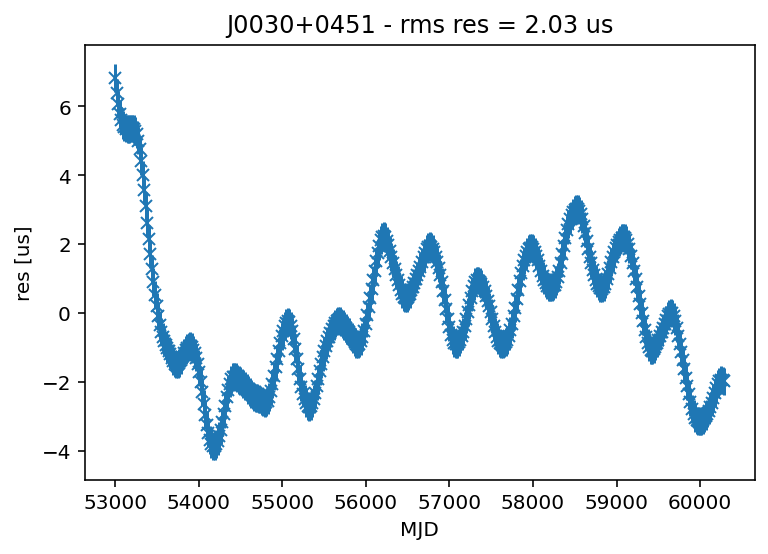

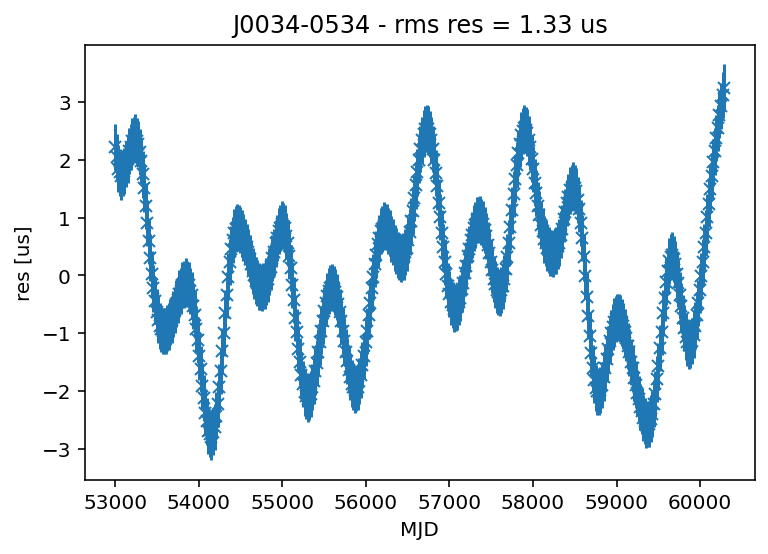

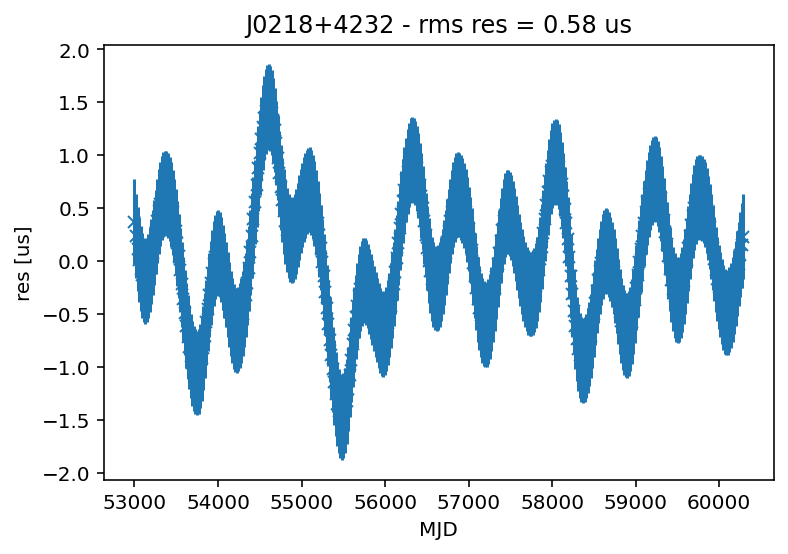

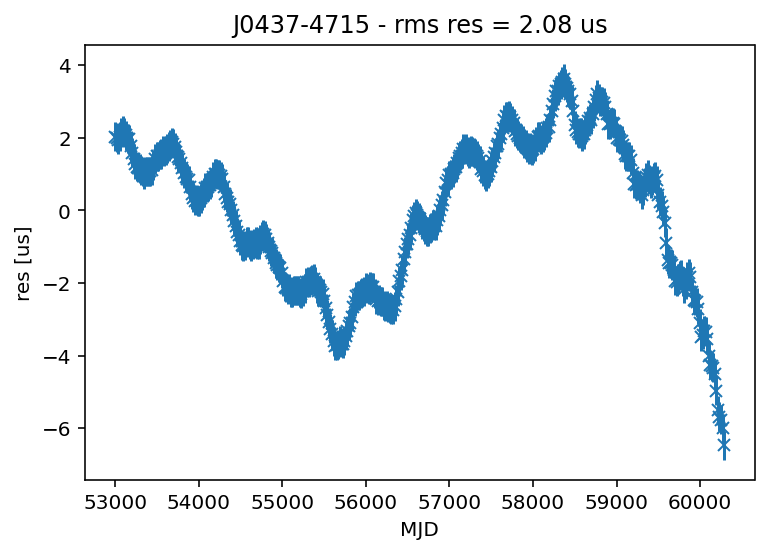

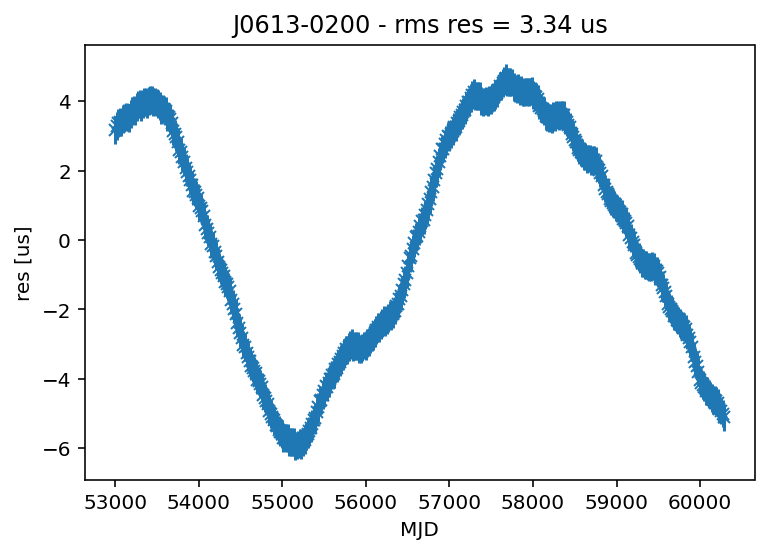

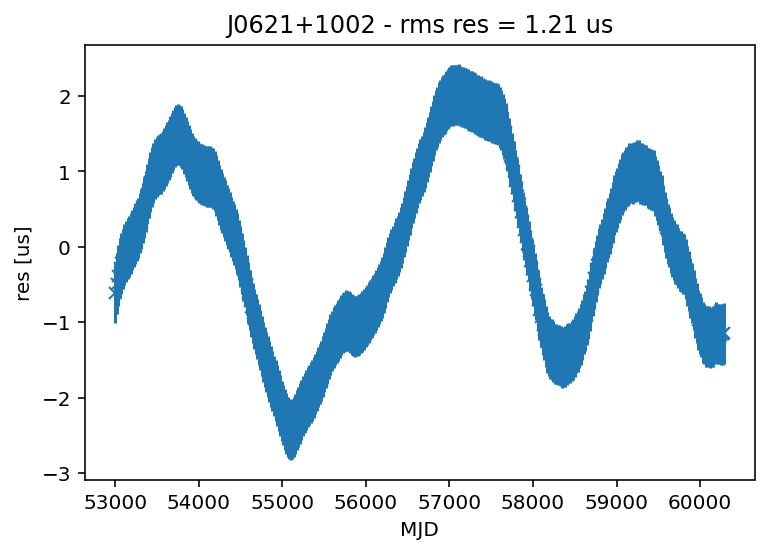

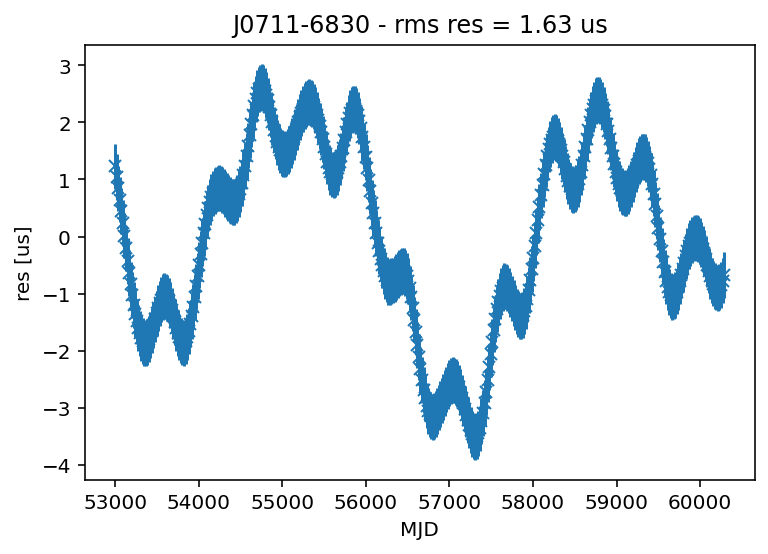

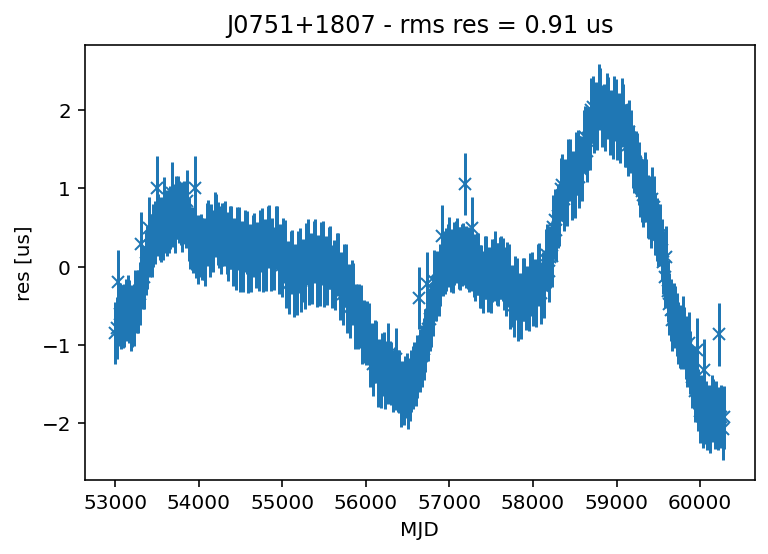

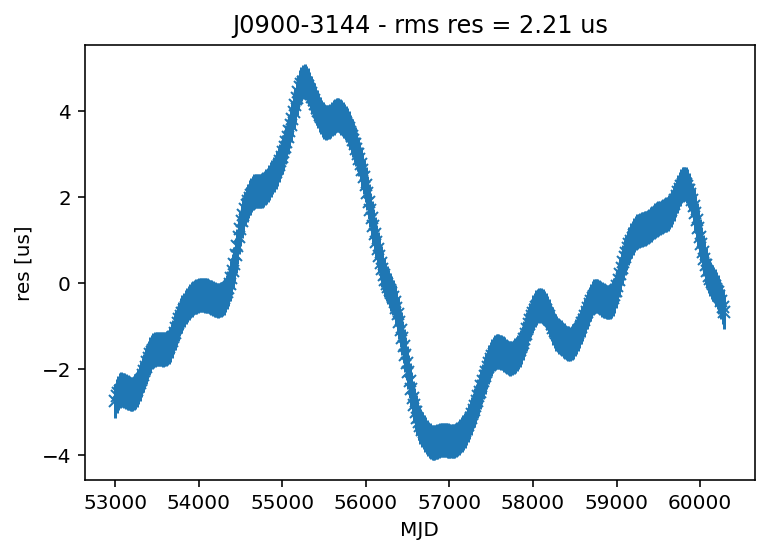

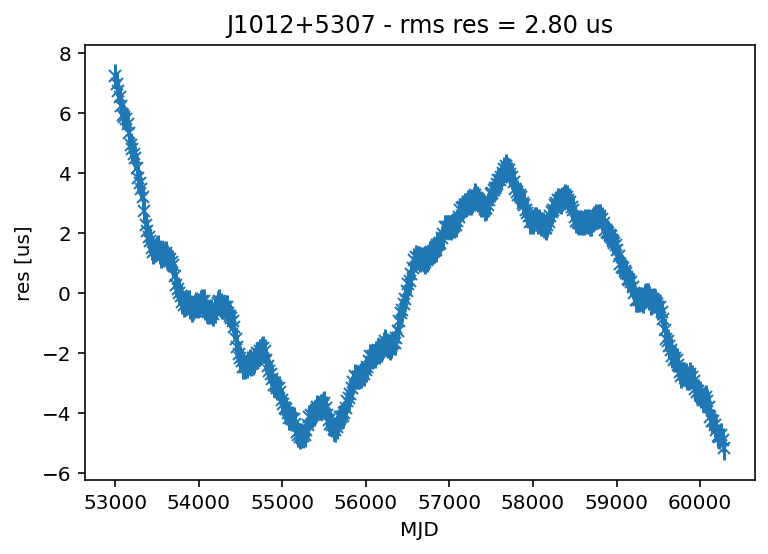

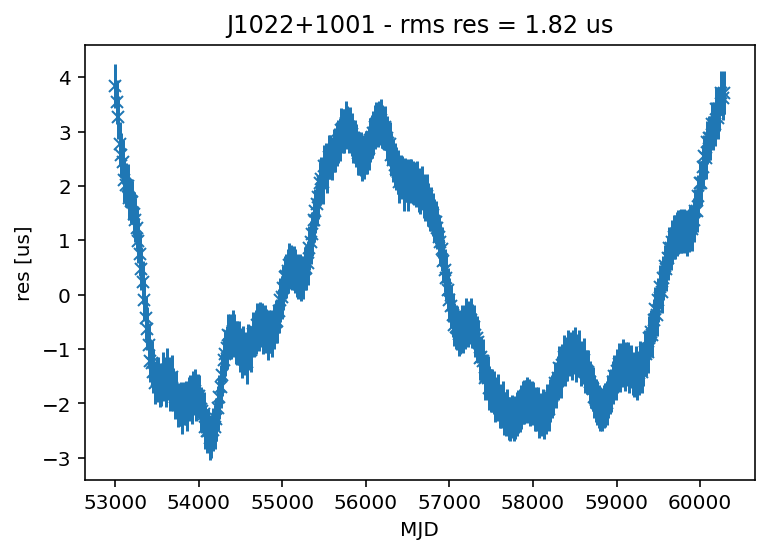

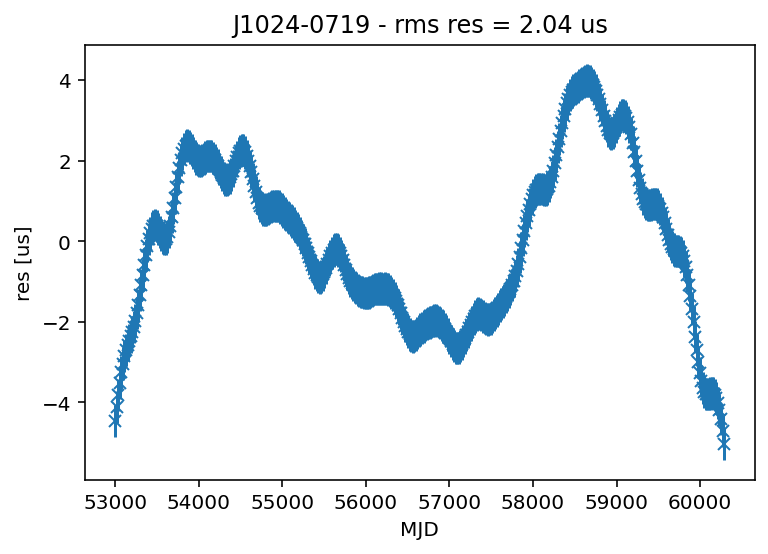

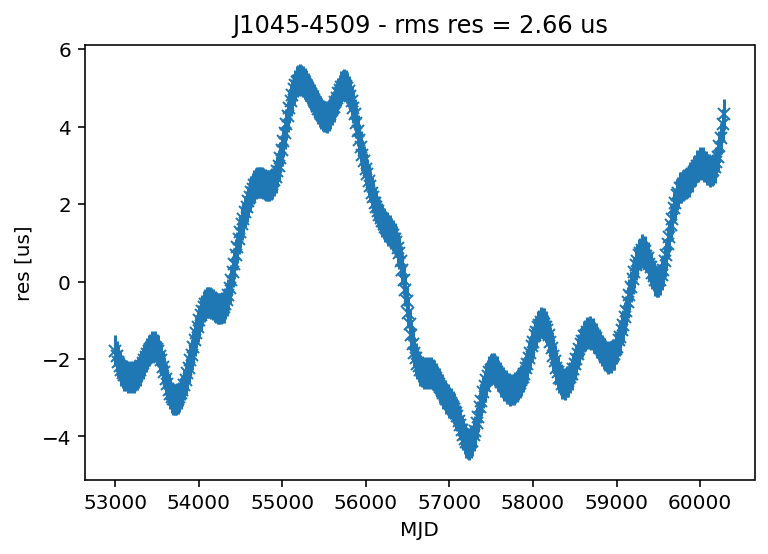

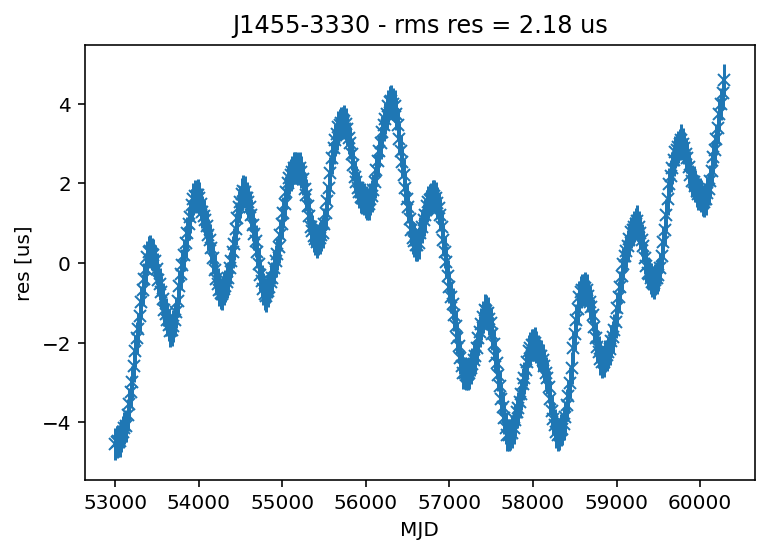

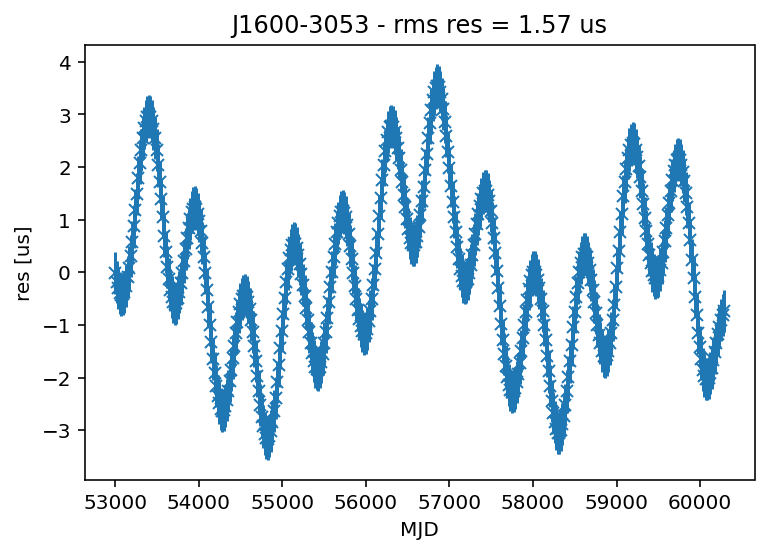

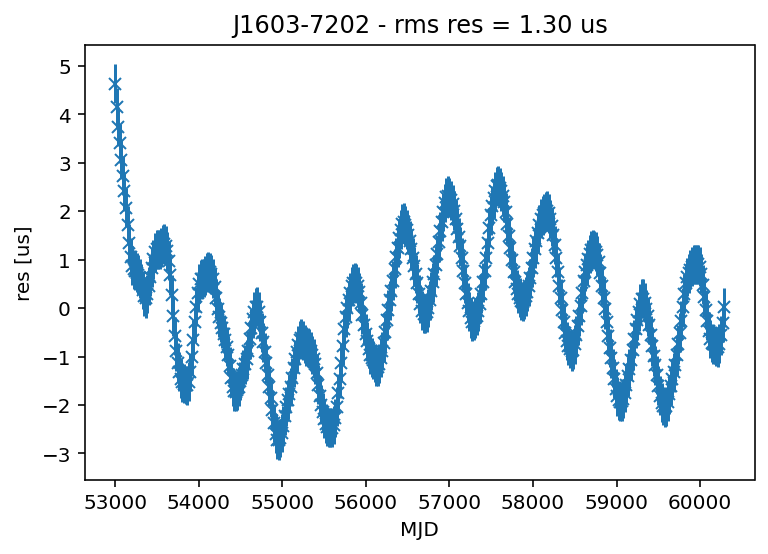

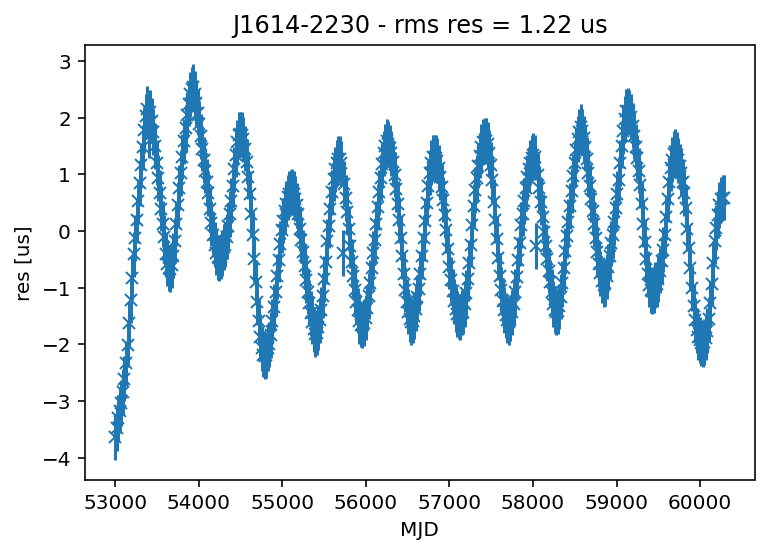

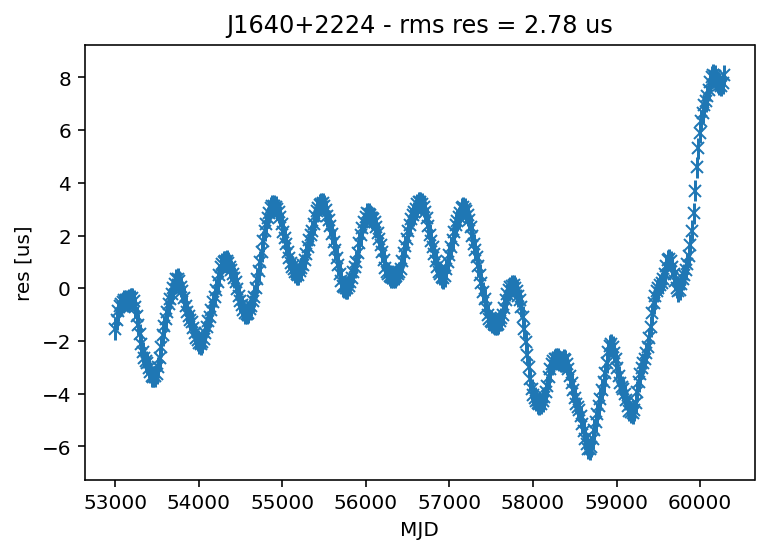

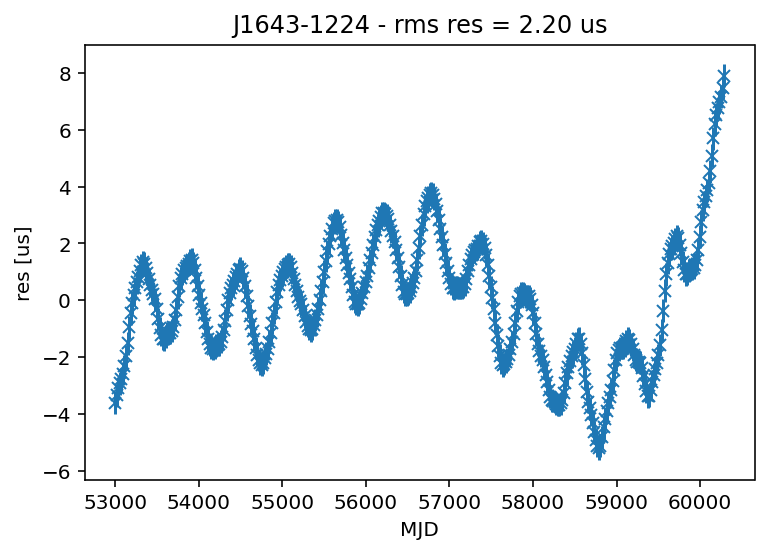

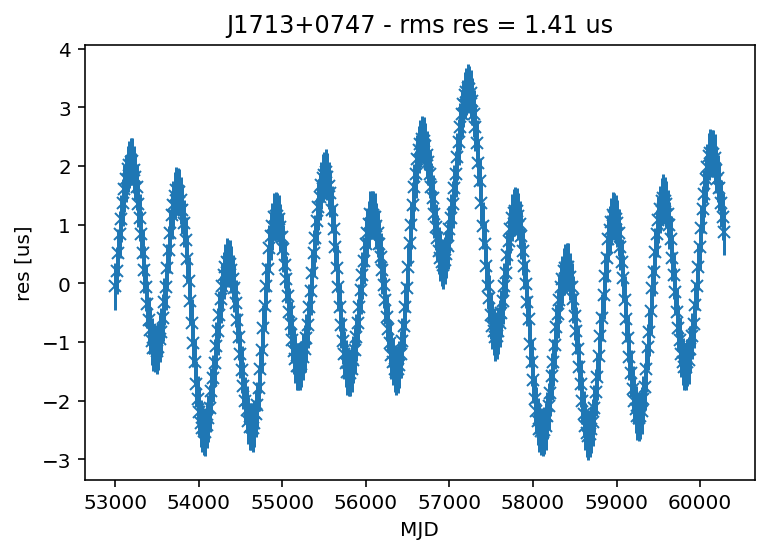

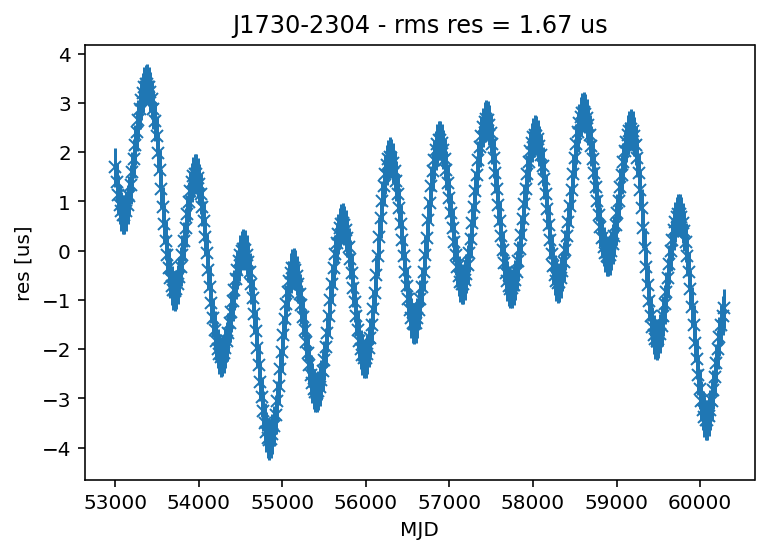

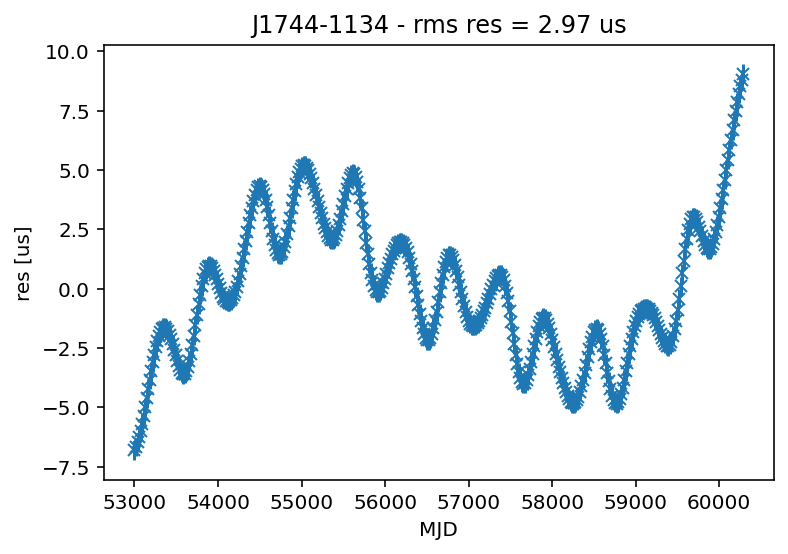

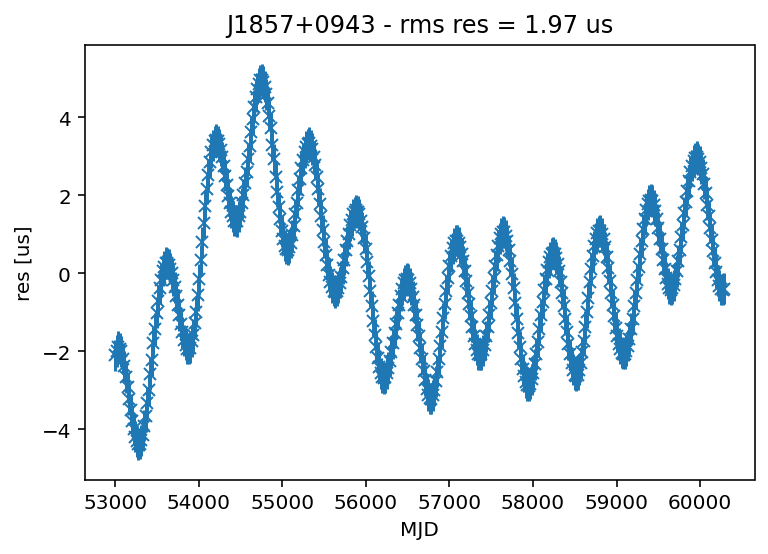

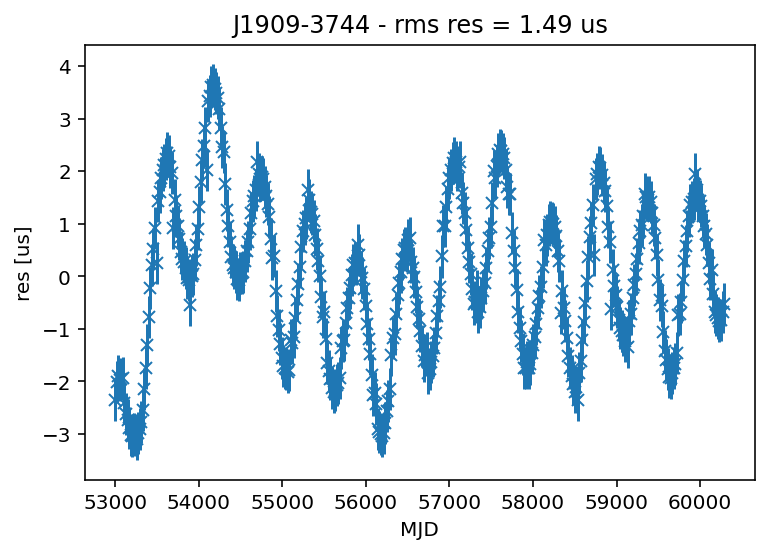

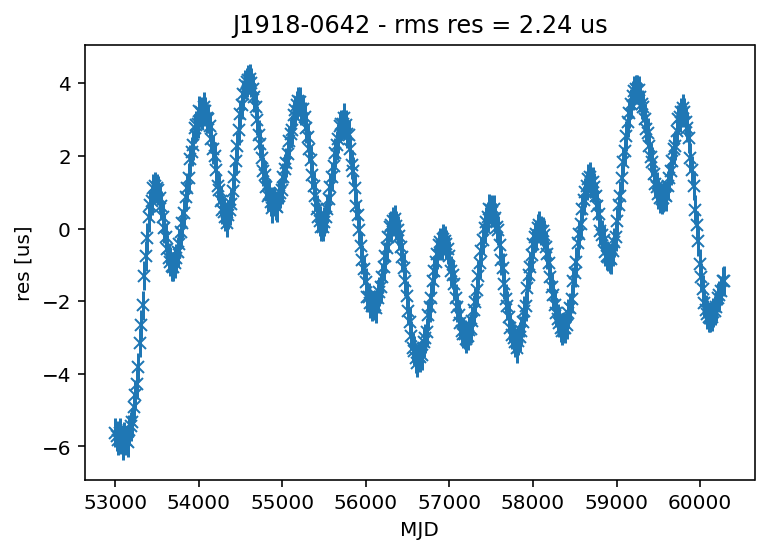

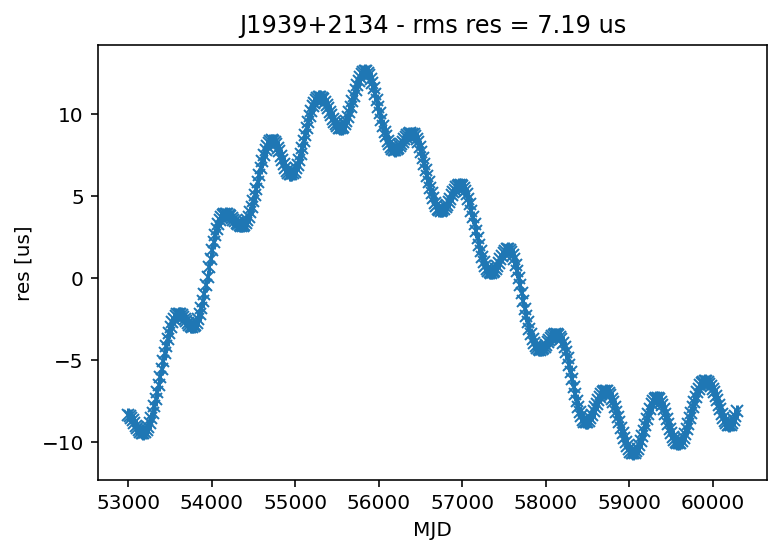

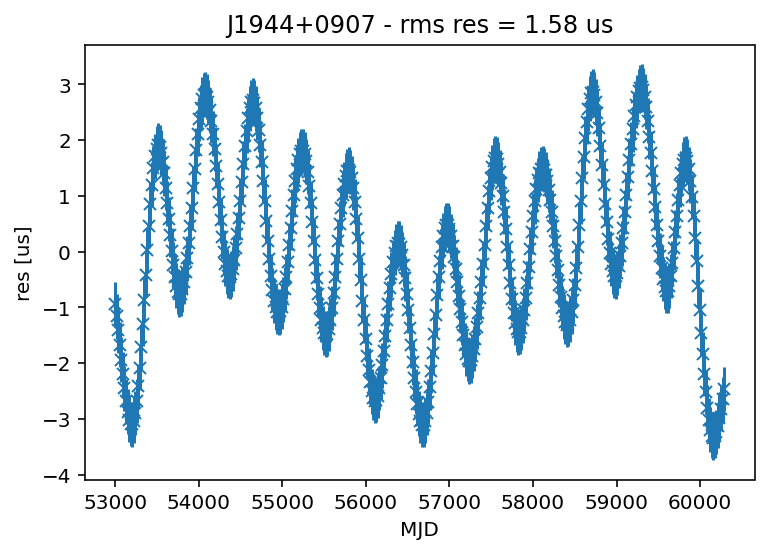

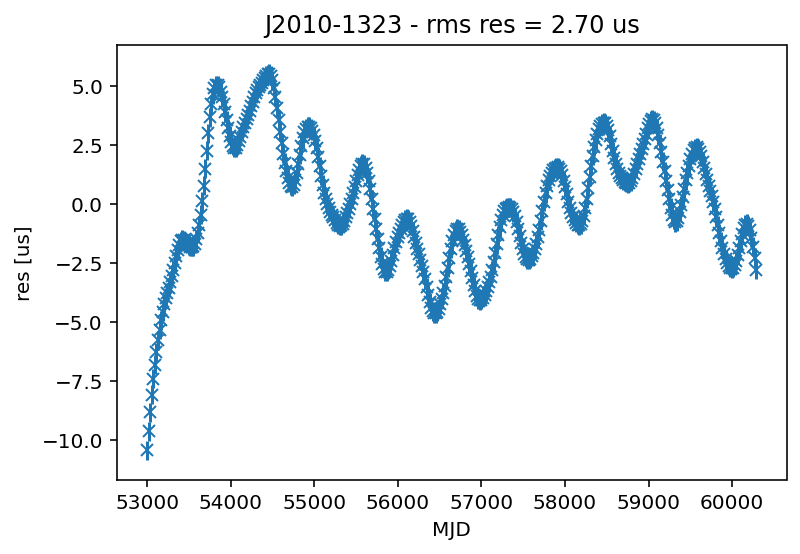

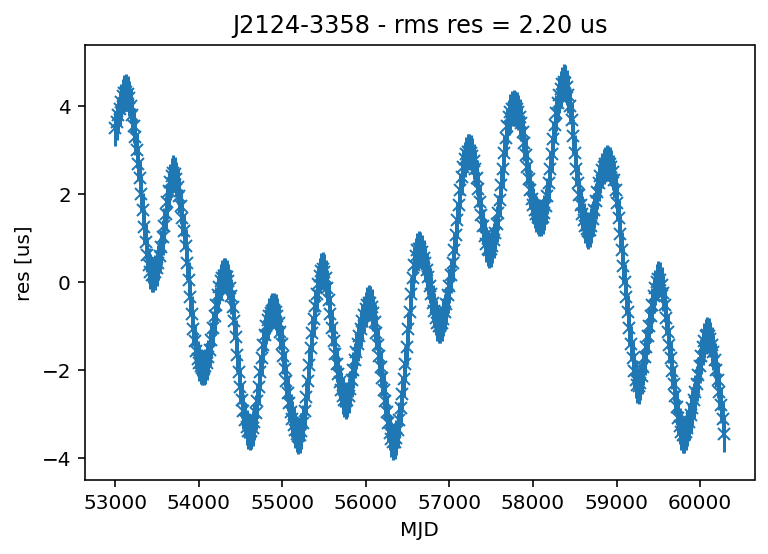

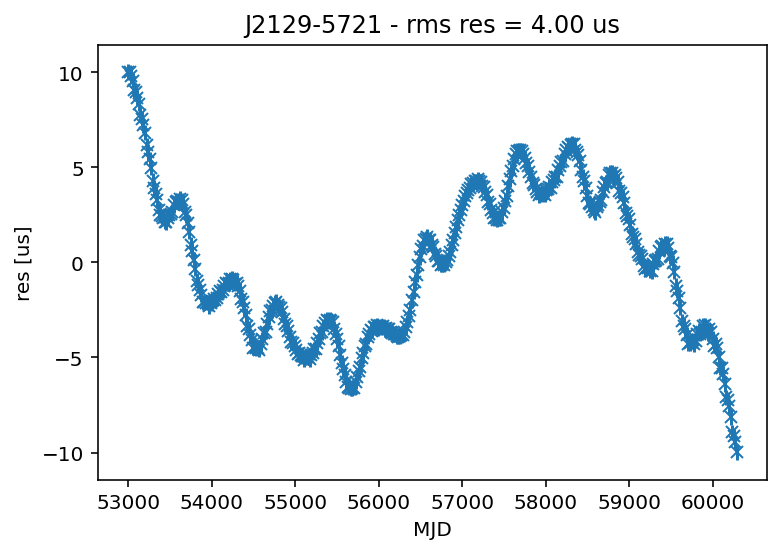

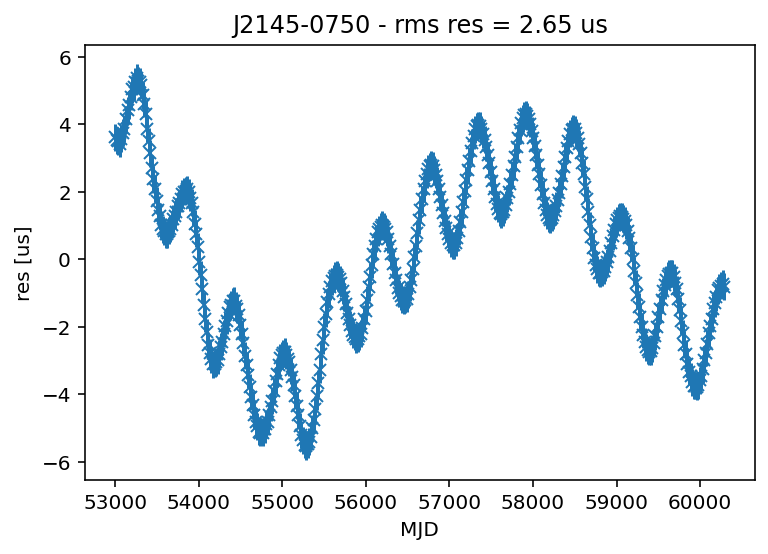

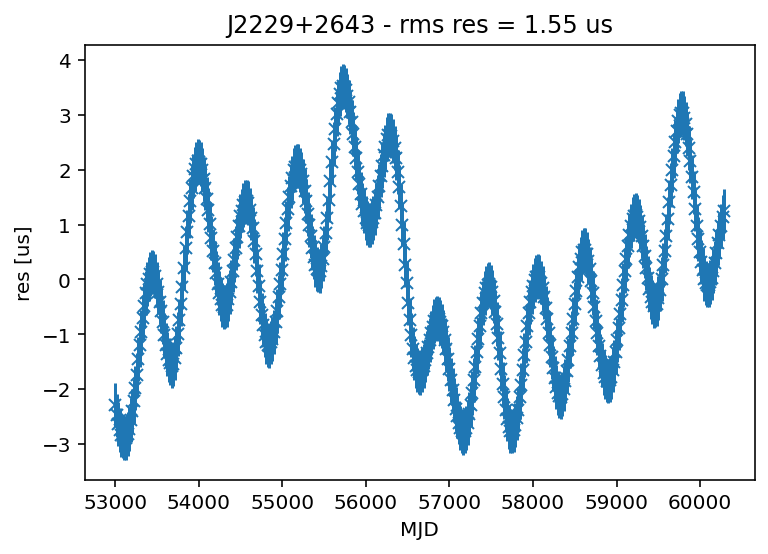

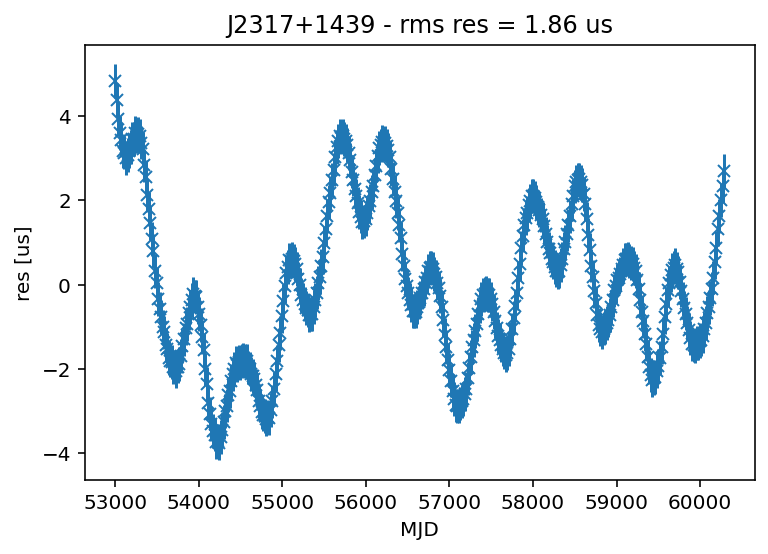

In [15]:
# plotting residuals from libstempo pulsar objects

for i in range(len(psrs)):
    plt.figure(i)
    LP.plotres(psrs[i])

/var/folders/tq/_zbt6tvn54j23tbg267ynw3c0000gr/T/ipykernel_95222/1619198698.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(i)


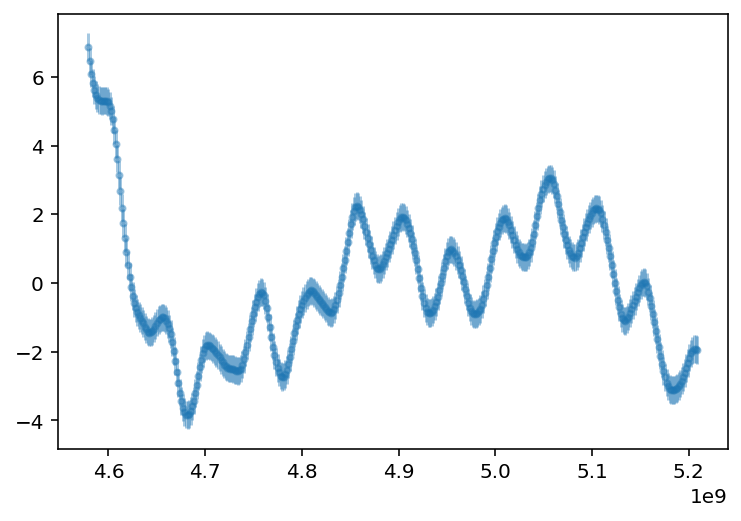

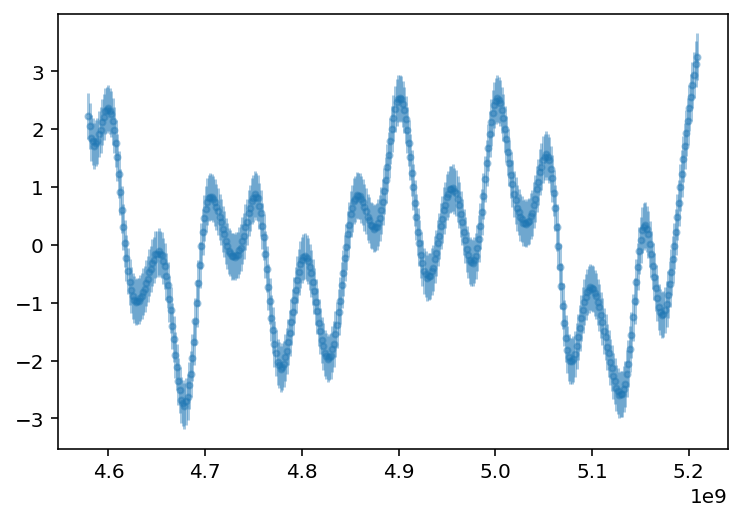

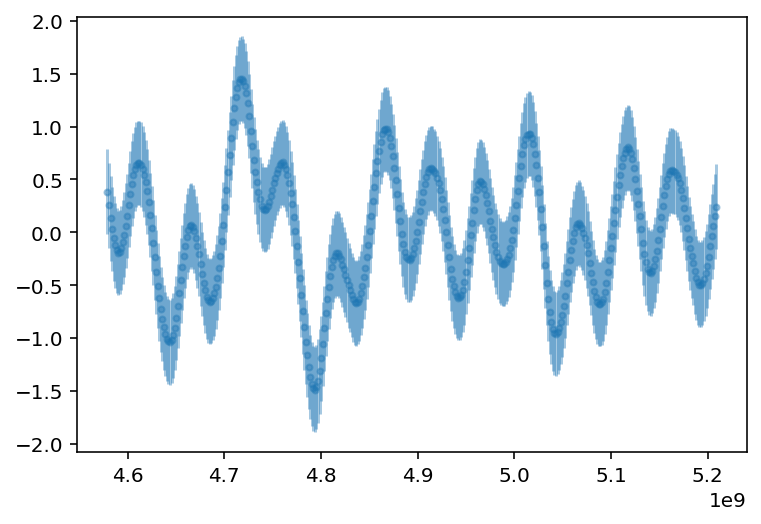

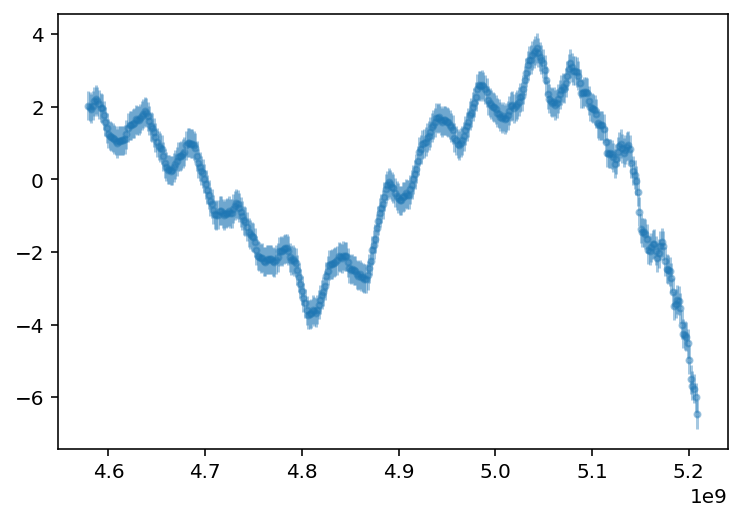

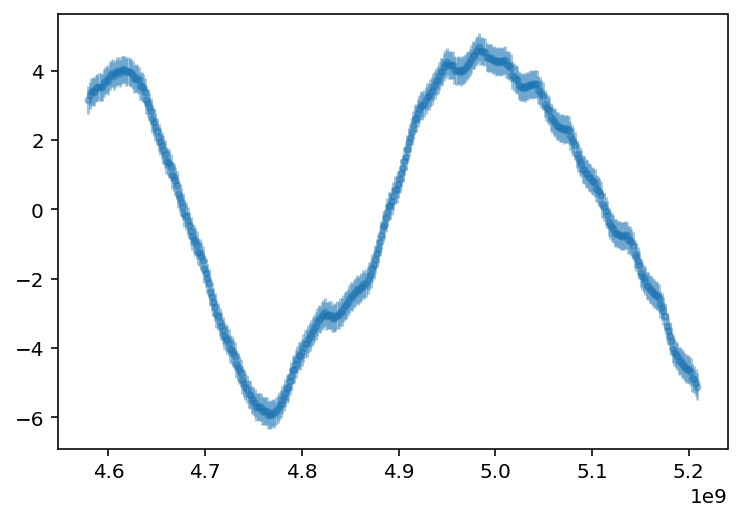

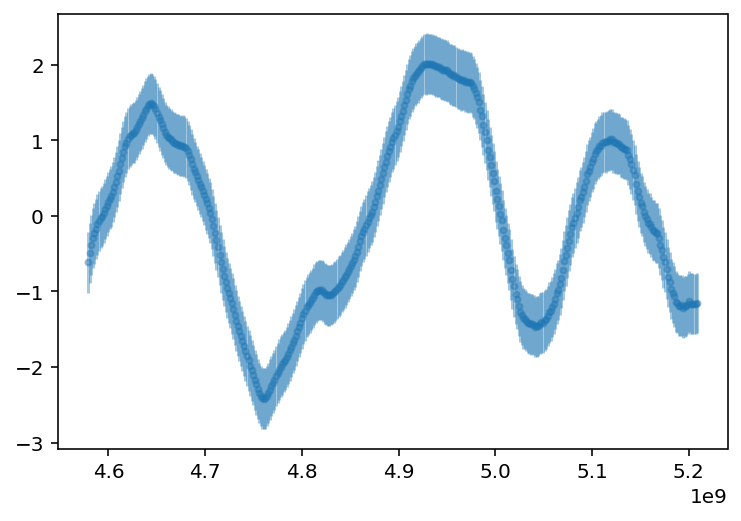

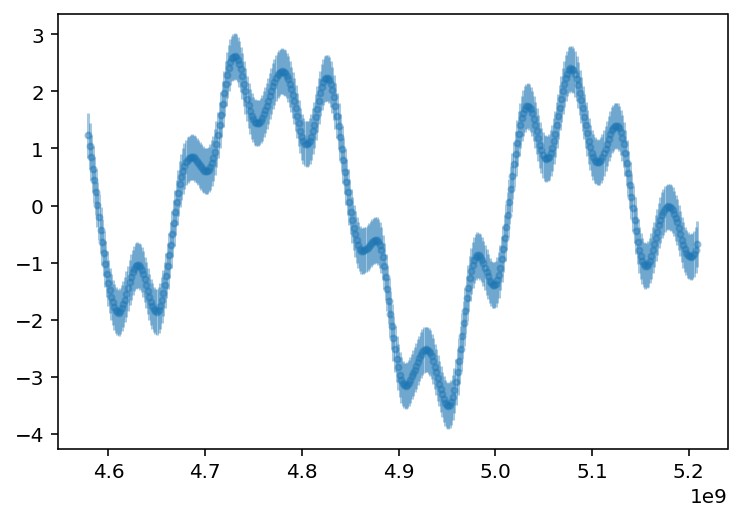

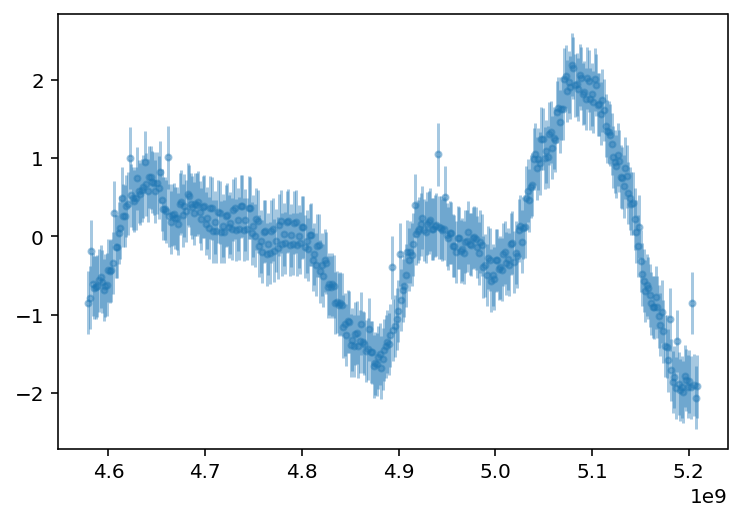

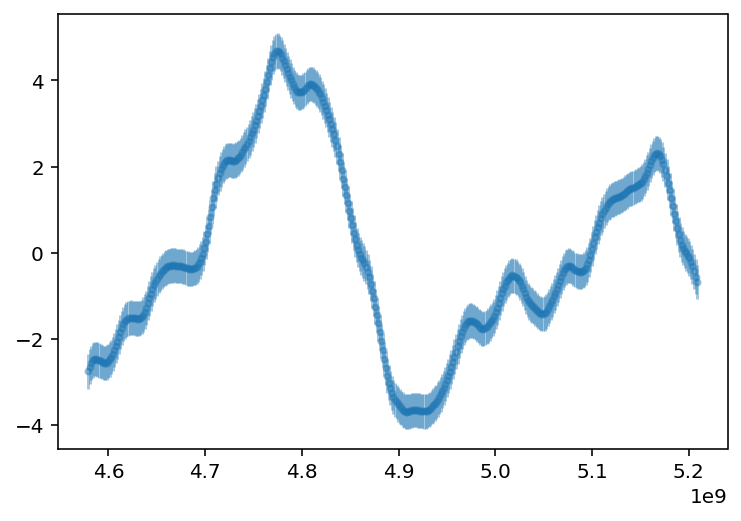

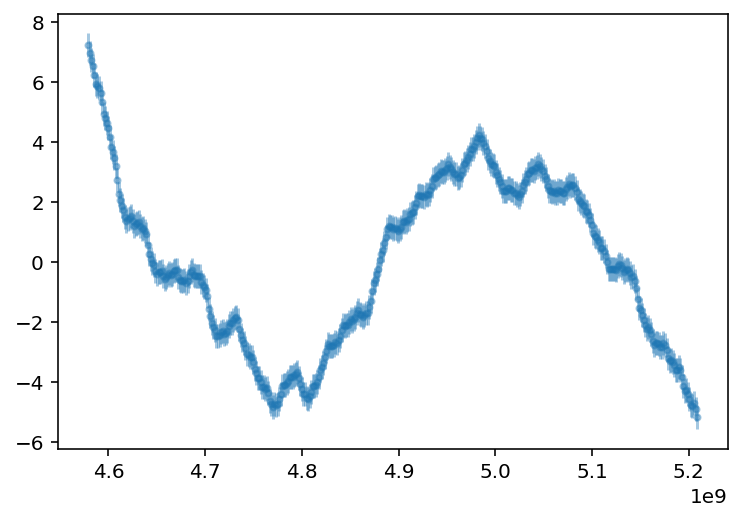

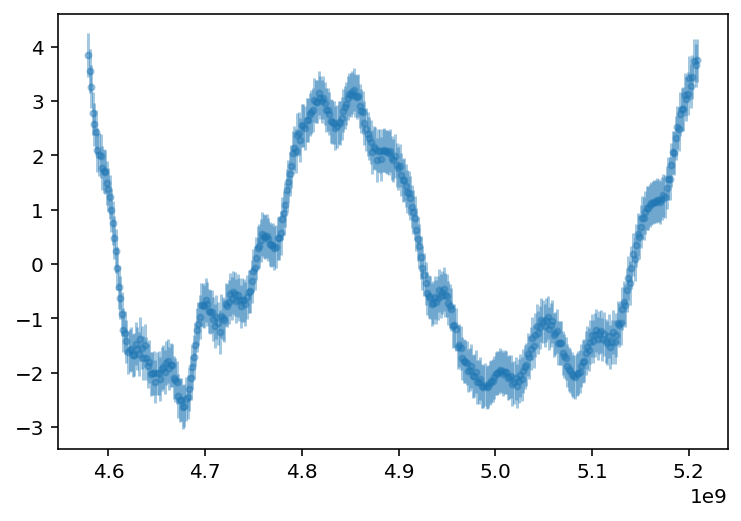

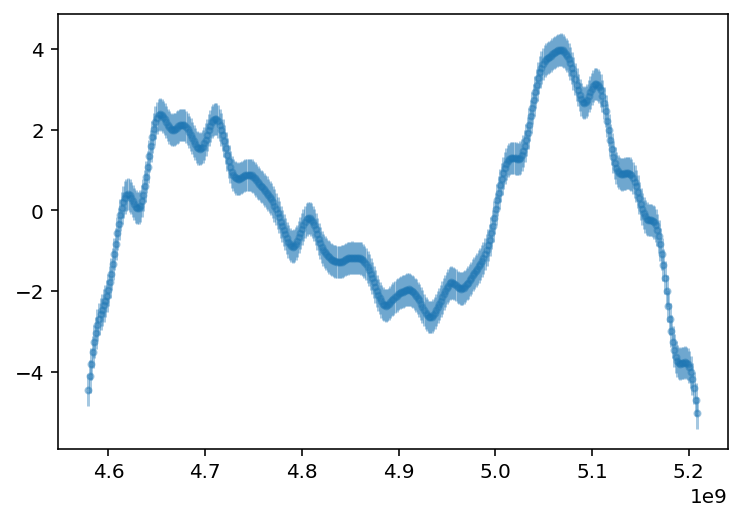

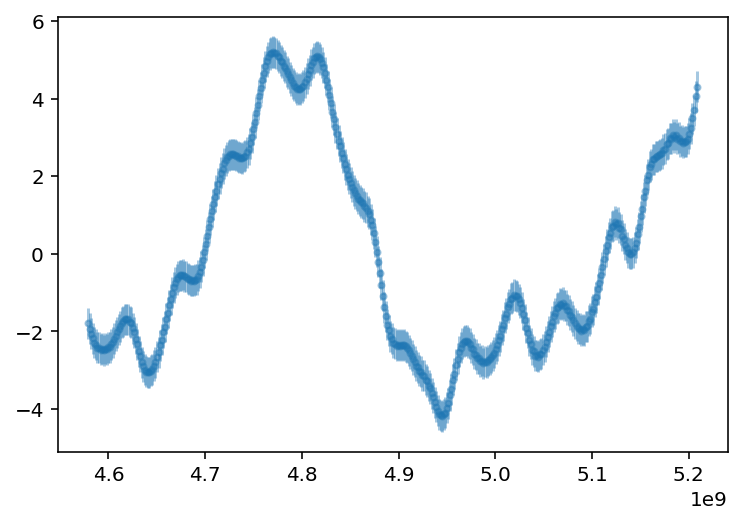

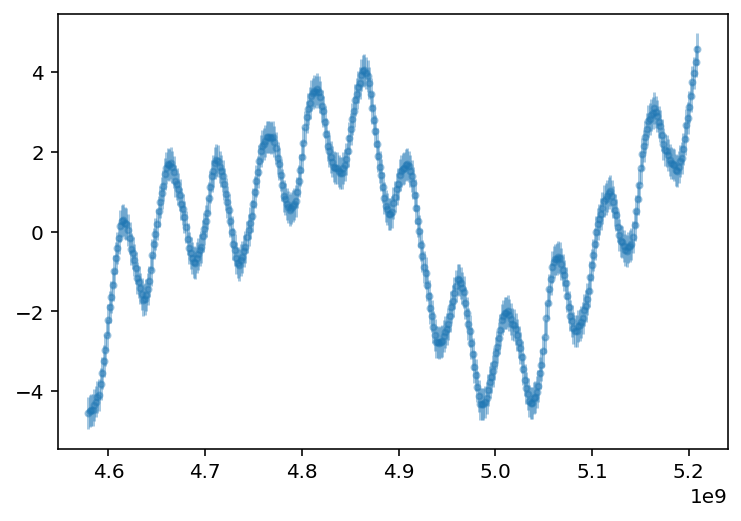

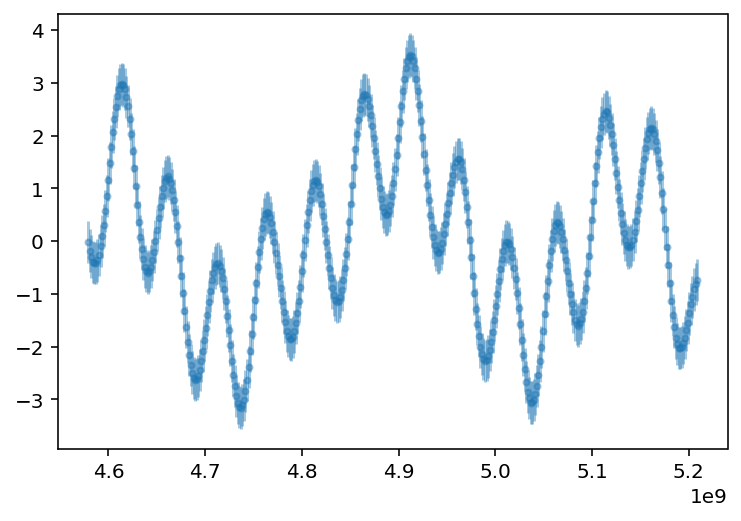

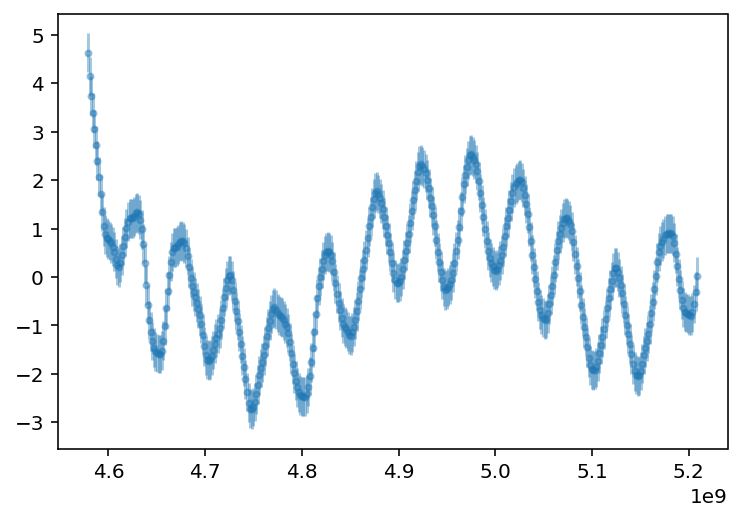

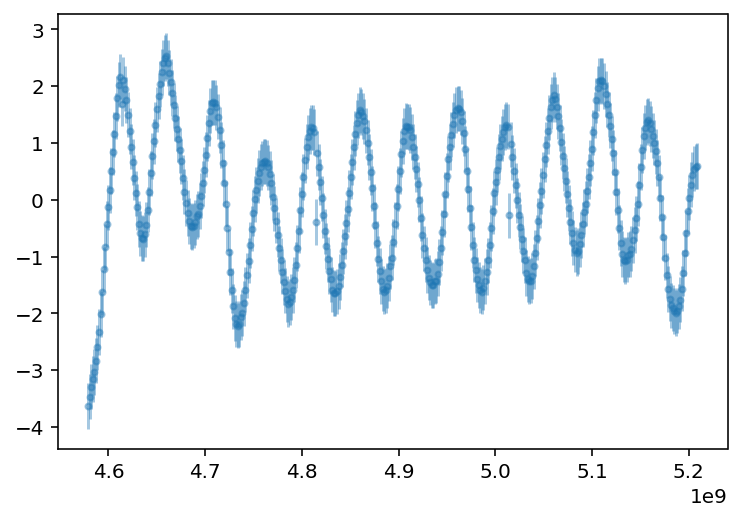

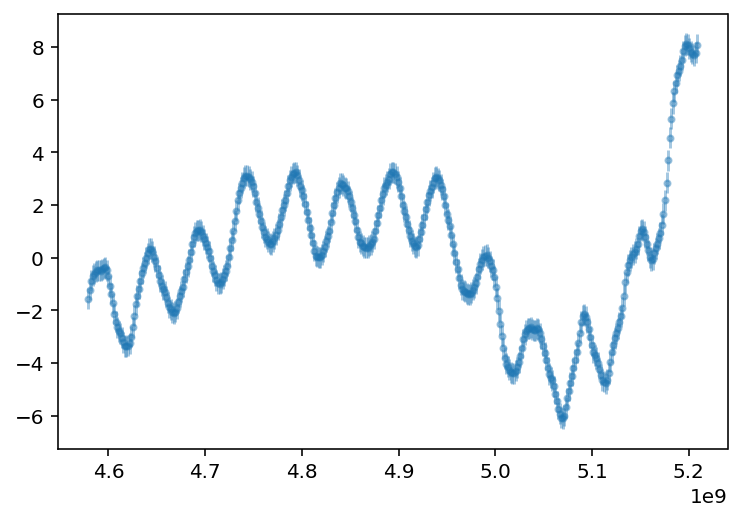

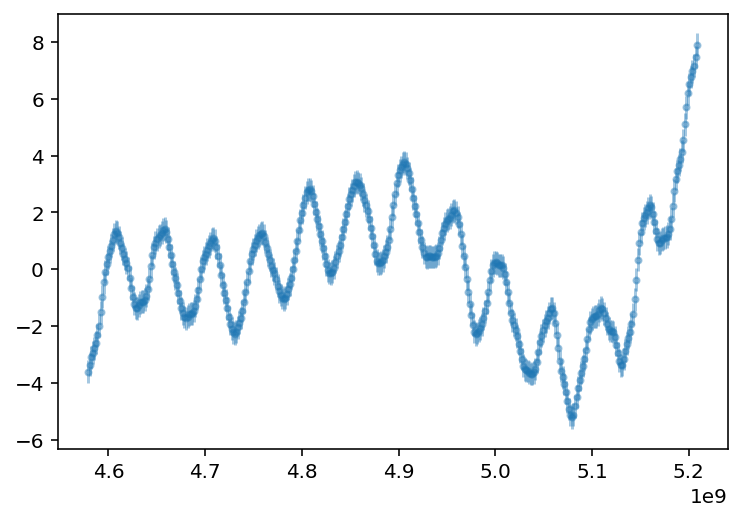

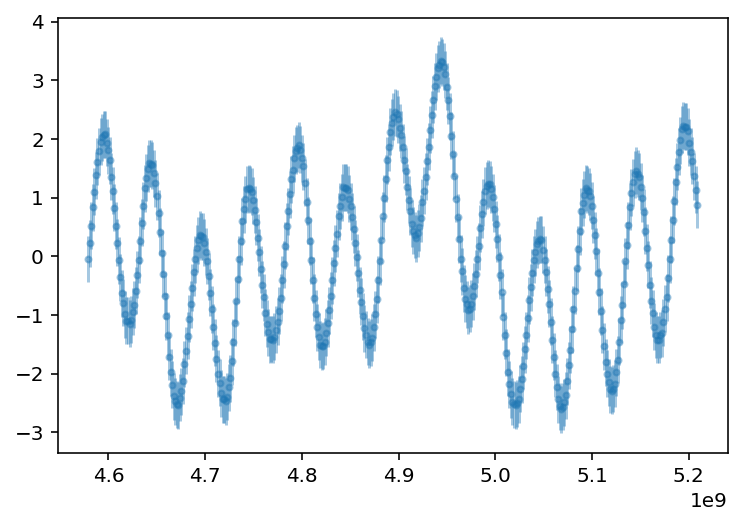

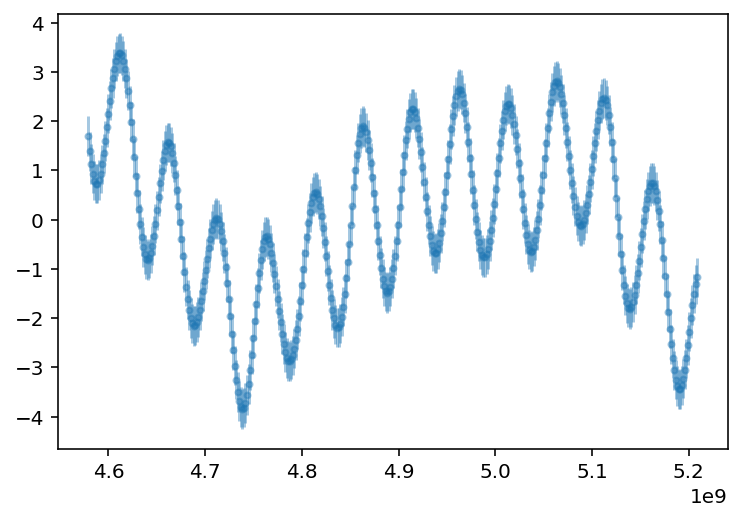

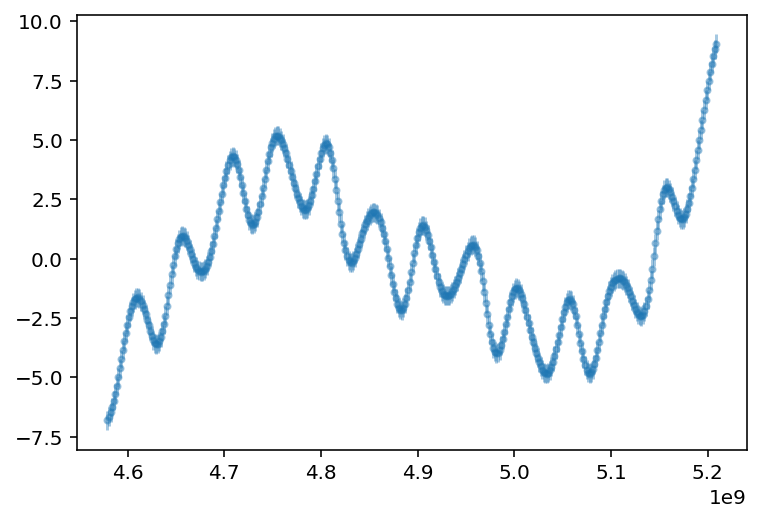

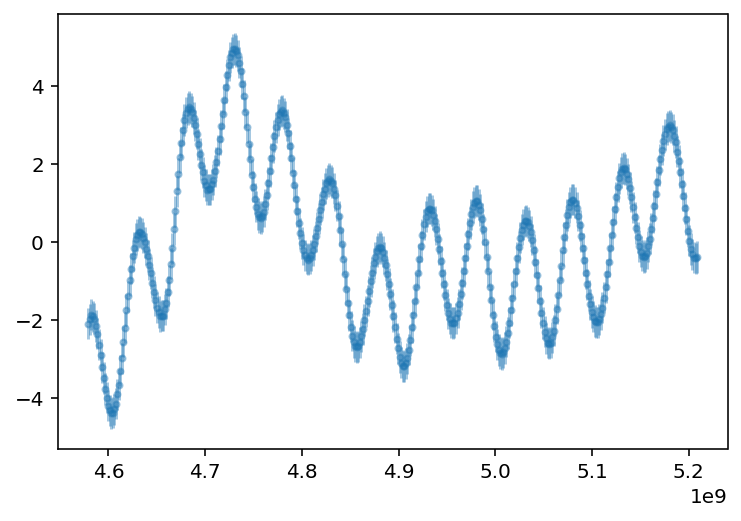

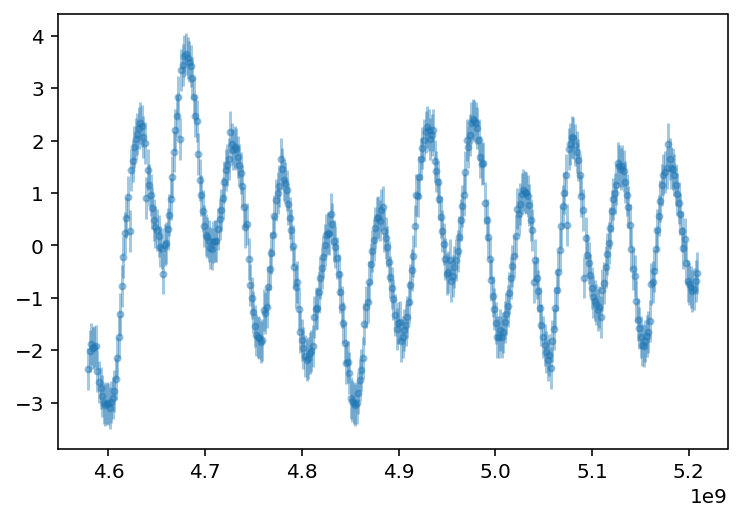

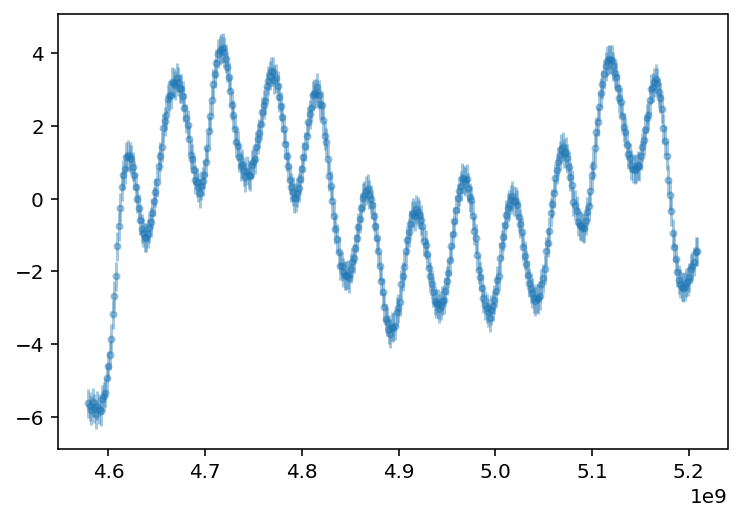

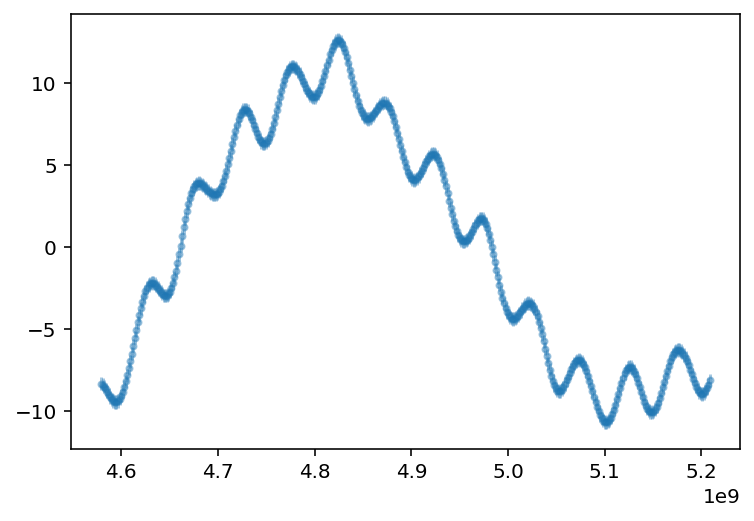

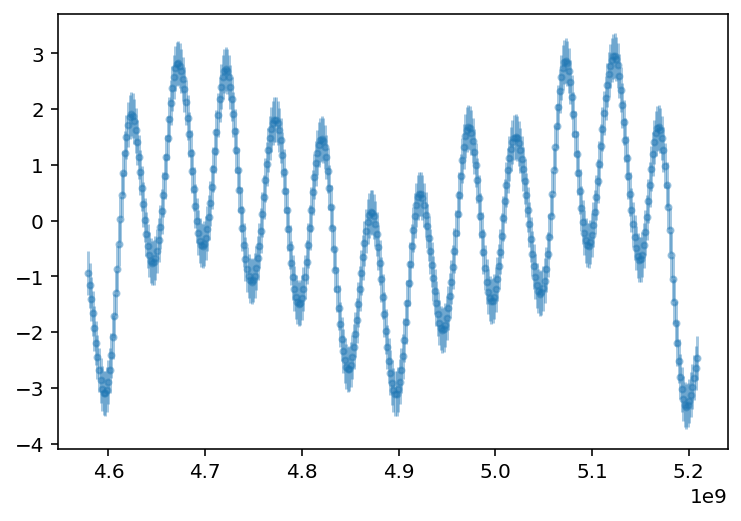

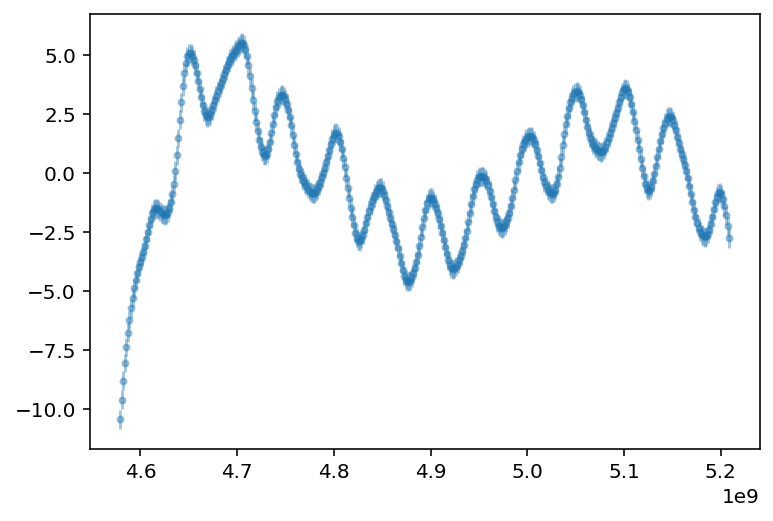

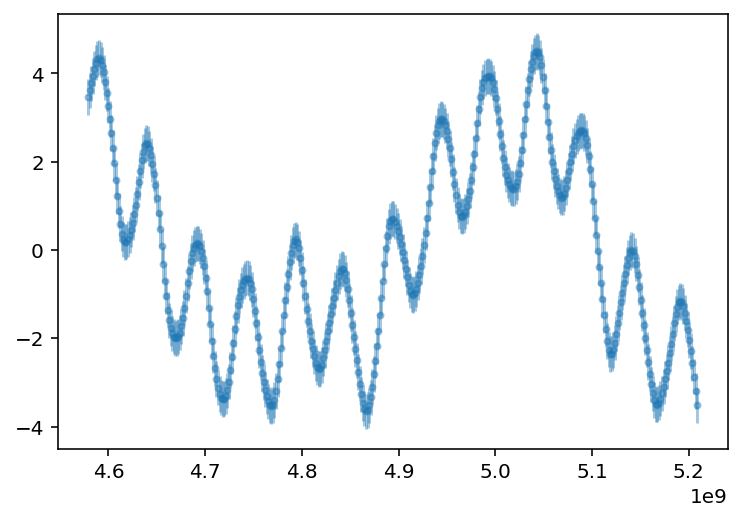

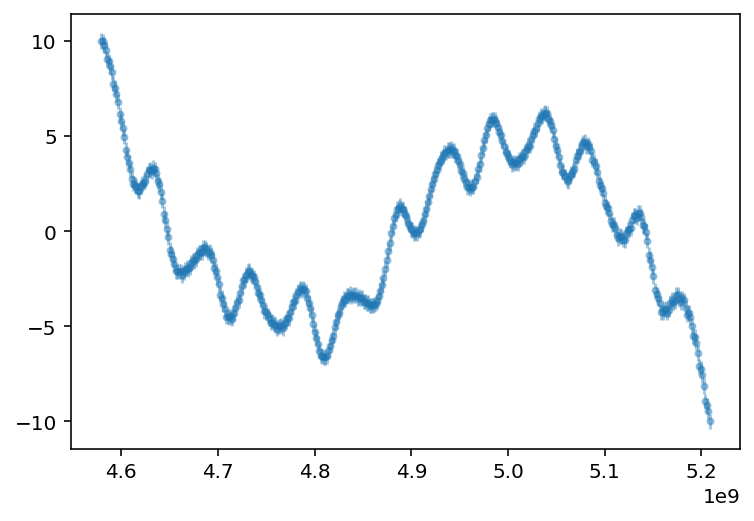

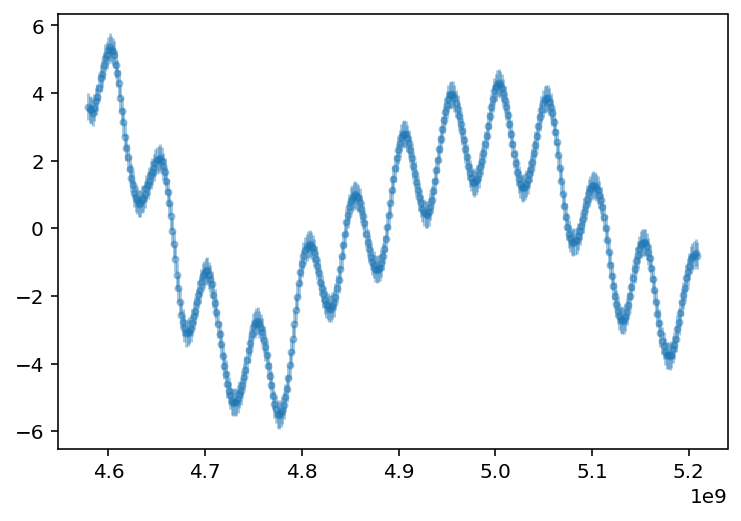

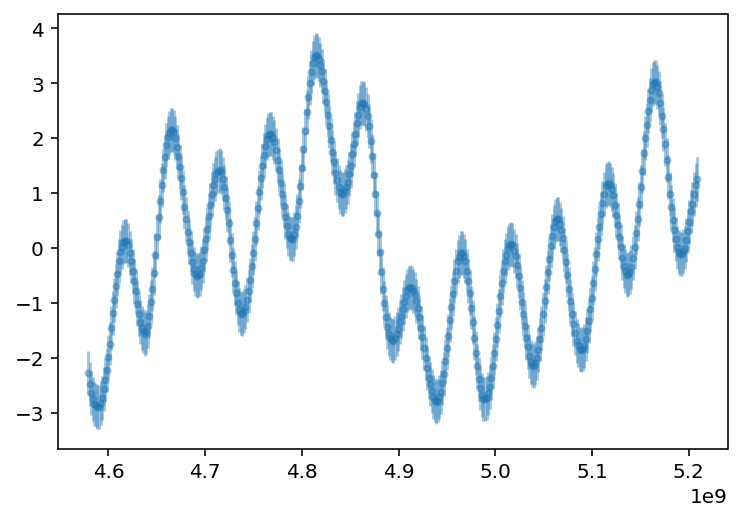

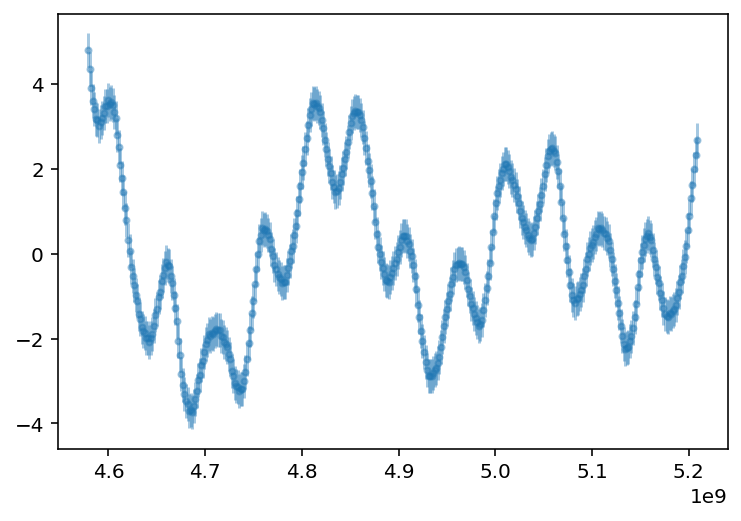

In [17]:
# convert libstempo pulsar objects into enterprise pulsar objects
Epsrs = lt2ent(psrs)
    
# can also plot residuals from enterprise pulsar objects
for i, p in enumerate(Epsrs):
    plt.figure(i)
    plt.errorbar(p.toas, 
                 p.residuals/1e-6, 
                 p.toaerrs/1e-6, 
                 fmt='.', alpha=0.4);
plt.show()

In [18]:
# can save your simulated timfiles if you so desire
# (should be in libstempo format)
# change directory to save to as you wish

save_sims(psrs, outdir='./sims/')